## A Whirlwind Introduction to the RDKit for Cheminformatics

In this notebook, we'll provide a quick overview of the RDKit and how it can be used from a Jupyter notebook.  In a Jupyter notebook, there are two types of cells, text cells have a white background, and code cells have a grey background.  If you're workign in Google Colab,, the text cells have a grey background and the code cells have a black background. To execute a code cell, hold down the shift key and hit return.  This will execute the code and move to the next cell. In a text cell, shift-return will simply move the cursor to the next cell.

Install the necessary Python libraries

In [1]:
# !pip install rdkit-pypi pandas seaborn mols2grid requests

Import the necessary Python libraries

In [2]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframe
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid
import requests

RDKit WARNING: [21:36:53] Enabling RDKit 2019.09.3 jupyter extensions


### Displaying a chemical structure
Create a molecule (benzene) from a SMILES string and put the molecule into a variable called **mol**. 

In [3]:
mol = Chem.MolFromSmiles("c1ccccc1")

We can display the value of a variable in a Jupyter notebook by typing the variable name and clicking shift-return. 

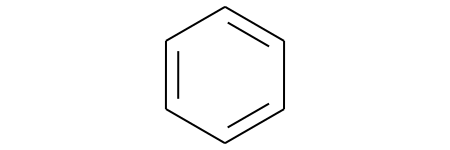

In [5]:
mol

The SMILES representations for most marketed drugs are available from the Wikipedia page for the corresponding drug.  For instance, we can get the SMILES for the oncology drug Imatinib (aka Gleevec) from [Wikipedia](https://en.wikipedia.org/wiki/Imatinib). With this SMILES string in hand, we can generate an RDKit molecule.

In [6]:
glvc = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")

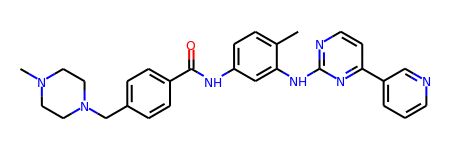

In [7]:
glvc

### Reading Multiple Chemical Structures
The RDKit also provides the ability to read molecules from common molecular structure formats.  In the code below we use the RDKit's [SDMolSupplier](https://www.rdkit.org/docs/cppapi/classRDKit_1_1SDMolSupplier.html) to read molecules from an [SD file](https://en.wikipedia.org/wiki/Chemical_table_file). First, we'll download the file from GitHub. 

In [8]:
url = "https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/example_compounds.sdf"
r = requests.get(url)
bytes_written = open('example_compounds.sdf', 'w').write(r.text)

Now we'll read the file. 

In [9]:
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

The code above reads the molecules into a list.  When we display this, we see a list of molecule objects.  Below we'll take a look at a couple of ways to display multiple chemical structures in a grid. 

In [10]:
mols

### Displaying Multiple Chemical Structures in a Grid
The RDKit's built-in [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html) method provides a convenient way of displaying a grid of structures. 

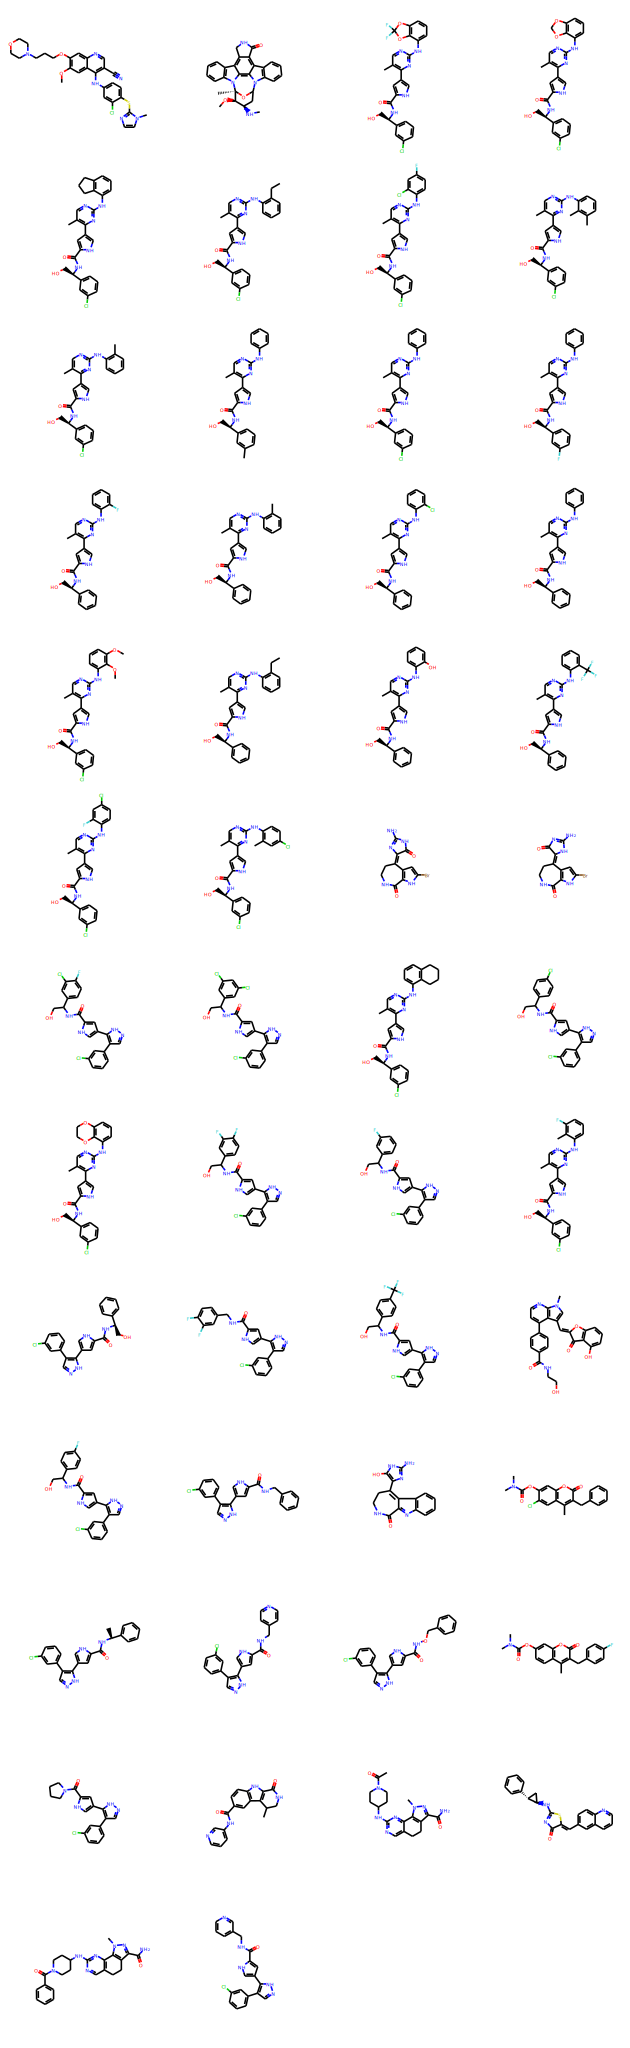

In [15]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

We can also use the [mols2grid](https://github.com/cbouy/mols2grid) Python library to generate a more flexible grid view that also allows selections. 

In [19]:
mols2grid.display(mols)

If we select a few of the checkboxes in the grid above, we can programmatically get the selected cells. 

In [31]:
mols2grid.get_selection()  # this didnt work, but the below did
# my mols2grid version might be different from the colab NB

AttributeError: module 'mols2grid' has no attribute 'get_selection'

In [32]:
mols2grid.selection

{0: 'COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc1OCCCN1CCOCC1',
 1: 'CN[C@@H]1CC2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4'}

### Using the RDKit With Pandas Dataframes
We can also read an SD file into a [Pandas](https://pandas.pydata.org/) dataframe.  The Pandas dataframe holds data in a grid data structure that can be seen as similar to a spreadsheet. 

In [33]:
df = PandasTools.LoadSDF("example_compounds.sdf")

We can use mols2grid to display the dataframe.  Note that we need to specify the column that contains the RDKit molecule. When the RDKit reads an SD file, the molecule is placed in the ROMol column. 

In [34]:
mols2grid.display(df,mol_col="ROMol")

### Adding Properties to a Pandas Dataframe
Let's add columns with molecular weight and LogP to the dataframe.

In [35]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

We can use mols2grid to display the dataframe with the newly added data. We can use the **subset** variable to indicate which dataframe columns to display.  Note that the structure image is specified by the **"img"** column. The **transform** variable can be used to specify the number of decimal places to display for the MW and LogP columns. The **transform** variable accepts a dictionary of column names mapped to formatting functions.

In [36]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP"],transform={"MW" : two_decimals, "LogP": two_decimals})

### Plotting Property Data

It's easy to access the data in the dataframe and use it to perform calculations and generate plots. For instance, we can use a boxplot to examine the distribution of molecular weight within the dataframe.

In [37]:
import seaborn as sns

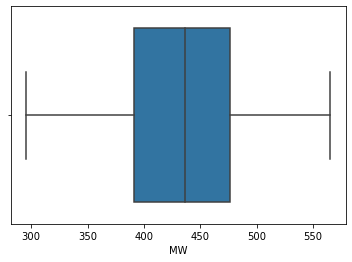

In [38]:
ax = sns.boxplot(x=df.MW)